In [1]:
import cvxpy as cp
import numpy as np
# Generate a random problem
np.random.seed(0)
m, n= 40, 25

A = np.random.rand(m, n)
b = np.random.randn(m)
# Construct a CVXPY problem
x = cp.Variable(n, integer=True)
objective = cp.Minimize(cp.sum_squares(A @ x - b))
prob = cp.Problem(objective)
prob.solve(solver = cp.GUROBI)

Set parameter Username
Academic license - for non-commercial use only - expires 2023-10-08


13.660003257778829

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
path_excel_file = '/Users/namanmakkar/Downloads/Final/ieee118.xls'
bus = pd.read_excel(open(path_excel_file, 'rb'), sheet_name='Bus')
bus

,Unnamed: 0,BusNumber,Pload,Qload
0,1,1,51,27
1,2,2,20,9
2,3,3,39,10
3,4,4,39,12
4,5,5,0,0
...,...,...,...,...
113,114,114,8,3
114,115,115,22,7
115,116,116,184,0
116,117,117,20,8


In [3]:
branch = pd.read_excel(open(path_excel_file, 'rb'), sheet_name='Branch')
branch

,branch_number,from_bus,to_bus,LineR,LineX,B(susceptance),rateA,rateC
0,1,1,3,0.0129,0.0424,-2358.490566,220,275
1,2,1,2,0.0303,0.0999,-1001.001001,220,275
2,3,2,12,0.0187,0.0616,-1623.376623,220,275
3,4,3,12,0.0484,0.1600,-625.000000,220,275
4,5,3,5,0.0241,0.1080,-925.925926,220,275
...,...,...,...,...,...,...,...,...
181,182,108,109,0.0105,0.0288,-3472.222222,220,275
182,183,109,110,0.0278,0.0762,-1312.335958,220,275
183,184,110,112,0.0247,0.0640,-1562.500000,220,275
184,185,110,111,0.0220,0.0755,-1324.503311,220,275


In [4]:
load = pd.read_excel(open(path_excel_file, 'rb'), sheet_name='Load')
load

,Hour,Day1,Day2,Day3,Day4,Day5
0,1,62,67,61,55,61
1,2,59,63,58,51,58
2,3,56,60,55,49,55
3,4,55,59,54,48,54
4,5,55,59,54,48,54
5,6,56,60,55,49,55
6,7,69,74,68,60,68
7,8,80,86,79,70,79
8,9,89,95,87,78,87
9,10,90,96,88,78,88


In [5]:
generation = pd.read_excel(open(path_excel_file,'rb'), sheet_name='Generation')
generation

,GenNumber,Bus,Pmax,Pmin,LinearCost,StartupCost,ShutdownCost,NoLoadCost,ReserveCost,minDOWN,minUP,HourlyRamp,Startup/ShutdownRamp
0,1,10,197,68.95,38.726400,3126.350,3126.350,933.571475,20,10,12,180,197
1,2,10,350,140.00,11.694500,5500.108,5500.108,379.148000,20,48,24,240,350
2,3,12,197,68.95,38.726400,3126.350,3126.350,933.571475,20,10,12,180,197
3,4,25,155,54.25,11.817600,1173.143,1173.143,310.640080,20,8,8,180,155
4,5,25,155,54.25,11.817600,1173.143,1173.143,310.640080,20,8,8,180,155
5,6,26,12,2.40,48.408000,274.312,274.312,79.602115,20,2,4,60,12
6,7,26,400,100.00,6.000000,0.000,0.000,441.876000,20,1,24,0,400
7,8,31,100,25.00,40.340000,2283.244,2283.244,786.710680,20,8,8,420,100
8,9,46,12,2.40,48.408000,274.312,274.312,79.602115,20,2,4,60,12
9,10,46,100,25.00,40.340000,2283.244,2283.244,786.710680,20,8,8,420,100


In [6]:
pmax = np.array(generation['Pmax'])/100.0
pmax

array([1.97, 3.5 , 1.97, 1.55, 1.55, 0.12, 4.  , 1.  , 0.12, 1.  , 1.55,
       1.55, 1.55, 1.  , 1.55, 0.2 , 0.2 , 0.2 , 1.97, 0.5 , 0.5 , 0.5 ,
       0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.12, 0.76, 4.  , 1.97,
       1.97, 4.  , 0.76, 0.76, 0.76, 0.76, 0.76, 1.97, 0.12, 0.12, 0.12,
       0.12, 0.2 , 0.2 , 0.2 , 1.  , 3.5 , 1.55, 0.12, 0.2 , 1.  ])

In [7]:
pmin = np.array(generation['Pmin'])/100.0
pmin

array([0.6895, 1.4   , 0.6895, 0.5425, 0.5425, 0.024 , 1.    , 0.25  ,
       0.024 , 0.25  , 0.5425, 0.5425, 0.5425, 0.25  , 0.5425, 0.158 ,
       0.158 , 0.158 , 0.6895, 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.024 , 0.152 , 1.    ,
       0.6895, 0.6895, 1.    , 0.152 , 0.152 , 0.152 , 0.152 , 0.152 ,
       0.6895, 0.024 , 0.024 , 0.024 , 0.024 , 0.158 , 0.158 , 0.158 ,
       0.25  , 1.4   , 0.5425, 0.024 , 0.158 , 0.25  ])

In [8]:
hourly_ramp = np.array(generation['HourlyRamp'])
hourly_ramp

array([ 180,  240,  180,  180,  180,   60,    0,  420,   60,  420,  180,
        180,  180,  420,  180,  180,  180,  180,  180, 3000, 3000, 3000,
       3000, 3000, 3000, 3000, 3000, 3000, 3000,   60,  120,    0,  180,
        180,    0,  120,  120,  120,  120,  120,  180,   60,   60,   60,
         60,  180,  180,  180,  420,  240,  180,   60,  180,  420])

In [9]:
startup_shutdown_ramp = np.array(generation['Startup/ShutdownRamp'])
startup_shutdown_ramp

array([197, 350, 197, 155, 155,  12, 400, 100,  12, 100, 155, 155, 155,
       100, 155,  20,  20,  20, 197,  50,  50,  50,  50,  50,  50,  50,
        50,  50,  50,  12,  76, 400, 197, 197, 400,  76,  76,  76,  76,
        76, 197,  12,  12,  12,  12,  20,  20,  20, 100, 350, 155,  12,
        20, 100])

In [10]:
E = len(branch['from_bus'])
N = max(branch['to_bus'])
fbus = list(branch['from_bus'])
tbus = list(branch['to_bus'])
M = [[0 for _ in range(N)] for _ in range(E)]

for edge in range(E):
    node1 = fbus[edge]
    node2 = tbus[edge]
    M[edge][node1 - 1] = -1
    M[edge][node2 - 1] = 1
M = np.array(M)
M = M.T

In [11]:
M

array([[-1, -1,  0, ...,  0,  0,  0],
       [ 0,  1, -1, ...,  0,  0,  0],
       [ 1,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]])

In [12]:
susceptances = np.array(branch['B(susceptance)'])/100.0
susceptances

array([ -23.58490566,  -10.01001001,  -16.23376623,   -6.25      ,
         -9.25925926,  -14.53488372, -125.31328321,  -18.51851852,
        -14.6627566 ,  -48.07692308,  -29.41176471,  -19.84126984,
        -32.78688525,  -37.45318352,  -31.05590062,  -51.02040816,
        -13.67989056,   -7.14285714,  -14.14427157,  -11.99040767,
         -4.09165303,   -5.12820513,  -25.38071066,   -8.03858521,
        -22.88329519,   -5.55247085,  -33.22259136,   -6.39795266,
        -19.8019802 ,  -20.28397566,   -4.048583  ,   -8.54700855,
        -11.77856302,  -10.30927835,   -6.28930818,   -8.67302689,
        -12.5       ,  -20.32520325,   -2.43013366,   -5.10204082,
         -6.13496933,  -11.62790698,  -26.17801047,  -13.49527665,
        -11.69590643,  -13.24503311,  -10.60445387,  -30.21148036,
        -25.77319588,  -18.51851852,  -10.15228426,  -16.33986928,
         -4.92610837,   -7.04225352,   -5.94883998, -106.38297872,
        -37.31343284,  -20.12072435,  -98.03921569,   -5.95238

In [13]:
b = np.diag(susceptances)
b = -b
b

array([[23.58490566, -0.        , -0.        , ..., -0.        ,
        -0.        , -0.        ],
       [-0.        , 10.01001001, -0.        , ..., -0.        ,
        -0.        , -0.        ],
       [-0.        , -0.        , 16.23376623, ..., -0.        ,
        -0.        , -0.        ],
       ...,
       [-0.        , -0.        , -0.        , ..., 15.625     ,
        -0.        , -0.        ],
       [-0.        , -0.        , -0.        , ..., -0.        ,
        13.24503311, -0.        ],
       [-0.        , -0.        , -0.        , ..., -0.        ,
        -0.        , 96.15384615]])

In [14]:
B = M @ b @ M.T
B

array([[ 33.59491567, -10.01001001, -23.58490566, ...,   0.        ,
          0.        ,   0.        ],
       [-10.01001001,  26.24377624,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [-23.58490566,   0.        ,  39.09416492, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ..., 246.91358025,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          7.14285714,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,  39.17237373]])

In [15]:
#B = -B
#B

In [16]:
b.shape

(186, 186)

In [17]:
N_g = max(generation['GenNumber'])
N_g

54

In [18]:
Egen = np.zeros((118,54))#[[0 for _ in range(N_g)] for _ in range(N)]
bus_gen = list(generation['Bus'])
gens = list(generation['GenNumber'])
for idx,bus_val in enumerate(bus_gen):
    Egen[bus_val-1, idx] = 1
Egen

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [19]:
noload_cost = np.array(generation['NoLoadCost'])
noload_cost

array([933.5714755 , 379.148     , 933.5714755 , 310.64008025,
       310.64008025,  79.6021152 , 441.876     , 786.71068   ,
        79.6021152 , 786.71068   , 310.64008025, 310.64008025,
       310.64008025, 786.71068   , 310.64008025, 486.0445122 ,
       486.0445122 , 486.0445122 , 933.5714755 ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,  79.6021152 , 200.9676436 , 441.876     ,
       933.5714755 , 933.5714755 , 441.876     , 200.9676436 ,
       200.9676436 , 200.9676436 , 200.9676436 , 200.9676436 ,
       933.5714755 ,  79.6021152 ,  79.6021152 ,  79.6021152 ,
        79.6021152 , 486.0445122 , 486.0445122 , 486.0445122 ,
       786.71068   , 379.148     , 310.64008025,  79.6021152 ,
       486.0445122 , 786.71068   ])

In [20]:
linear_cost = np.array(generation['LinearCost'])
linear_cost

array([38.7264  , 11.6945  , 38.7264  , 11.8176  , 11.8176  , 48.408   ,
        6.      , 40.34    , 48.408   , 40.34    , 11.8176  , 11.8176  ,
       11.8176  , 40.34    , 11.8176  , 83.818719, 83.818719, 83.818719,
       38.7264  ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      , 48.408   ,
       14.772   ,  6.      , 38.7264  , 38.7264  ,  6.      , 14.772   ,
       14.772   , 14.772   , 14.772   , 14.772   , 38.7264  , 48.408   ,
       48.408   , 48.408   , 48.408   , 83.818719, 83.818719, 83.818719,
       40.34    , 11.6945  , 11.8176  , 48.408   , 83.818719, 40.34    ])

In [21]:
startup_cost = np.array(generation['StartupCost'])
startup_cost

array([3126.35 , 5500.108, 3126.35 , 1173.143, 1173.143,  274.312,
          0.   , 2283.244,  274.312, 2283.244, 1173.143, 1173.143,
       1173.143, 2283.244, 1173.143,   28.905,   28.905,   28.905,
       3126.35 ,    0.   ,    0.   ,    0.   ,    0.   ,    0.   ,
          0.   ,    0.   ,    0.   ,    0.   ,    0.   ,  274.312,
        733.676,    0.   , 3126.35 , 3126.35 ,    0.   ,  733.676,
        733.676,  733.676,  733.676,  733.676, 3126.35 ,  274.312,
        274.312,  274.312,  274.312,   28.905,   28.905,   28.905,
       2283.244, 5500.108, 1173.143,  274.312,   28.905, 2283.244])

In [22]:
shutdown_cost = np.array(generation['ShutdownCost'])
shutdown_cost

array([3126.35 , 5500.108, 3126.35 , 1173.143, 1173.143,  274.312,
          0.   , 2283.244,  274.312, 2283.244, 1173.143, 1173.143,
       1173.143, 2283.244, 1173.143,   28.905,   28.905,   28.905,
       3126.35 ,    0.   ,    0.   ,    0.   ,    0.   ,    0.   ,
          0.   ,    0.   ,    0.   ,    0.   ,    0.   ,  274.312,
        733.676,    0.   , 3126.35 , 3126.35 ,    0.   ,  733.676,
        733.676,  733.676,  733.676,  733.676, 3126.35 ,  274.312,
        274.312,  274.312,  274.312,   28.905,   28.905,   28.905,
       2283.244, 5500.108, 1173.143,  274.312,   28.905, 2283.244])

In [23]:
reserve_cost = np.array(generation['ReserveCost'])
reserve_cost

array([20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20])

In [24]:
fmax = np.array(branch['rateA'])/100.0
fmax

array([ 2.2,  2.2,  2.2,  2.2,  2.2,  2.2,  4.4,  2.2,  2.2,  2.2,  2.2,
        2.2, 11. ,  8.8, 11. ,  2.2,  2.2,  2.2,  2.2,  2.2,  2.2,  2.2,
        2.2,  2.2,  4.4,  2.2,  2.2,  2.2,  2.2,  2.2,  2.2,  2.2,  2.2,
        2.2,  2.2,  2.2,  4.4,  2.2,  2.2,  2.2,  4.4,  6.6,  2.2,  2.2,
        2.2,  2.2,  2.2,  2.2,  6.6,  2.2,  2.2,  2.2,  2.2,  2.2,  2.2,
        4.4,  2.2,  2.2,  2.2,  2.2,  2.2,  4.4,  6.6,  2.2,  2.2,  2.2,
        2.2,  2.2,  2.2,  2.2,  2.2,  2.2,  2.2,  2.2,  2.2,  2.2,  2.2,
        2.2,  2.2,  4.4,  4.4,  2.2,  2.2,  2.2,  2.2,  2.2,  2.2,  2.2,
        2.2,  2.2,  2.2,  2.2,  2.2,  2.2,  2.2,  2.2,  2.2,  2.2,  2.2,
        2.2,  2.2,  2.2,  4.4,  2.2,  2.2,  2.2,  4.4,  4.4,  4.4,  2.2,
        2.2,  2.2,  2.2,  4.4,  2.2,  4.4,  2.2,  4.4,  4.4,  2.2,  2.2,
        2.2,  2.2,  2.2,  2.2,  2.2,  2.2,  2.2,  2.2,  2.2,  2.2,  4.4,
        2.2,  2.2,  2.2,  2.2,  2.2,  2.2,  2.2,  2.2,  2.2,  2.2,  2.2,
        2.2,  2.2,  2.2,  2.2,  2.2,  2.2,  4.4,  2

In [25]:
fmin = -fmax
fmin

array([ -2.2,  -2.2,  -2.2,  -2.2,  -2.2,  -2.2,  -4.4,  -2.2,  -2.2,
        -2.2,  -2.2,  -2.2, -11. ,  -8.8, -11. ,  -2.2,  -2.2,  -2.2,
        -2.2,  -2.2,  -2.2,  -2.2,  -2.2,  -2.2,  -4.4,  -2.2,  -2.2,
        -2.2,  -2.2,  -2.2,  -2.2,  -2.2,  -2.2,  -2.2,  -2.2,  -2.2,
        -4.4,  -2.2,  -2.2,  -2.2,  -4.4,  -6.6,  -2.2,  -2.2,  -2.2,
        -2.2,  -2.2,  -2.2,  -6.6,  -2.2,  -2.2,  -2.2,  -2.2,  -2.2,
        -2.2,  -4.4,  -2.2,  -2.2,  -2.2,  -2.2,  -2.2,  -4.4,  -6.6,
        -2.2,  -2.2,  -2.2,  -2.2,  -2.2,  -2.2,  -2.2,  -2.2,  -2.2,
        -2.2,  -2.2,  -2.2,  -2.2,  -2.2,  -2.2,  -2.2,  -4.4,  -4.4,
        -2.2,  -2.2,  -2.2,  -2.2,  -2.2,  -2.2,  -2.2,  -2.2,  -2.2,
        -2.2,  -2.2,  -2.2,  -2.2,  -2.2,  -2.2,  -2.2,  -2.2,  -2.2,
        -2.2,  -2.2,  -2.2,  -4.4,  -2.2,  -2.2,  -2.2,  -4.4,  -4.4,
        -4.4,  -2.2,  -2.2,  -2.2,  -2.2,  -4.4,  -2.2,  -4.4,  -2.2,
        -4.4,  -4.4,  -2.2,  -2.2,  -2.2,  -2.2,  -2.2,  -2.2,  -2.2,
        -2.2,  -2.2,

In [26]:
power_demand_day1 = [[0 for _ in range(24)] for _ in range(N)]
power_demand_day2 = [[0 for _ in range(24)] for _ in range(N)]
power_demand_day3 = [[0 for _ in range(24)] for _ in range(N)]
power_demand_day4 = [[0 for _ in range(24)] for _ in range(N)]
power_demand_day5 = [[0 for _ in range(24)] for _ in range(N)]
demand_percent_day1 = np.array(load['Day1']/100.0)
demand_percent_day2 = np.array(load['Day2'])/100.0
demand_percent_day3 = np.array(load['Day3'])/100.0
demand_percent_day4 = np.array(load['Day4'])/100.0
demand_percent_day5 = np.array(load['Day5'])/100.0

In [27]:
demand_percent_day1

array([0.62, 0.59, 0.56, 0.55, 0.55, 0.56, 0.69, 0.8 , 0.89, 0.9 , 0.9 ,
       0.89, 0.89, 0.89, 0.87, 0.88, 0.92, 0.93, 0.93, 0.9 , 0.85, 0.77,
       0.68, 0.59])

In [28]:
demand_percentage_matrix = np.array([demand_percent_day1, demand_percent_day2, demand_percent_day3, demand_percent_day4, demand_percent_day5])
demand_percentage_matrix

array([[0.62, 0.59, 0.56, 0.55, 0.55, 0.56, 0.69, 0.8 , 0.89, 0.9 , 0.9 ,
        0.89, 0.89, 0.89, 0.87, 0.88, 0.92, 0.93, 0.93, 0.9 , 0.85, 0.77,
        0.68, 0.59],
       [0.67, 0.63, 0.6 , 0.59, 0.59, 0.6 , 0.74, 0.86, 0.95, 0.96, 0.96,
        0.95, 0.95, 0.95, 0.93, 0.94, 0.99, 1.  , 1.  , 0.96, 0.91, 0.83,
        0.73, 0.63],
       [0.61, 0.58, 0.55, 0.54, 0.54, 0.55, 0.68, 0.79, 0.87, 0.88, 0.88,
        0.87, 0.87, 0.87, 0.85, 0.86, 0.91, 0.92, 0.92, 0.88, 0.83, 0.76,
        0.67, 0.58],
       [0.55, 0.51, 0.49, 0.48, 0.48, 0.49, 0.6 , 0.7 , 0.78, 0.78, 0.78,
        0.78, 0.78, 0.78, 0.76, 0.77, 0.81, 0.82, 0.82, 0.78, 0.74, 0.68,
        0.6 , 0.51],
       [0.61, 0.58, 0.55, 0.54, 0.54, 0.55, 0.68, 0.79, 0.87, 0.88, 0.88,
        0.87, 0.87, 0.87, 0.85, 0.86, 0.91, 0.91, 0.91, 0.88, 0.83, 0.76,
        0.67, 0.58]])

In [29]:
p_load = np.array(bus['Pload'])/100.0
p_load

array([0.51, 0.2 , 0.39, 0.39, 0.  , 0.52, 0.19, 0.28, 0.  , 0.  , 0.7 ,
       0.47, 0.34, 0.14, 0.9 , 0.25, 0.11, 0.6 , 0.45, 0.18, 0.14, 0.1 ,
       0.07, 0.13, 0.  , 0.  , 0.71, 0.17, 0.24, 0.  , 0.43, 0.59, 0.23,
       0.59, 0.33, 0.31, 0.  , 0.  , 0.27, 0.66, 0.37, 0.96, 0.18, 0.16,
       0.53, 0.28, 0.34, 0.2 , 0.87, 0.17, 0.17, 0.18, 0.23, 1.13, 0.63,
       0.84, 0.12, 0.12, 2.77, 0.78, 0.  , 0.77, 0.  , 0.  , 0.  , 0.39,
       0.28, 0.  , 0.  , 0.66, 0.  , 0.12, 0.06, 0.68, 0.47, 0.68, 0.61,
       0.71, 0.39, 1.3 , 0.  , 0.54, 0.2 , 0.11, 0.24, 0.21, 0.  , 0.48,
       0.  , 4.4 , 0.1 , 0.65, 0.12, 0.3 , 0.42, 0.38, 0.15, 0.34, 0.42,
       0.37, 0.22, 0.05, 0.23, 0.38, 0.31, 0.43, 0.5 , 0.02, 0.08, 0.39,
       0.  , 0.68, 0.06, 0.08, 0.22, 1.84, 0.2 , 0.33])

In [30]:
bus_number = np.array(bus['BusNumber'])
bus_number

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118])

In [31]:
for bus_idx in range(N):
    for hr in range(demand_percent_day1.shape[0]):
        power_demand_day1[bus_idx][hr] = p_load[bus_idx]*demand_percent_day1[hr]
        power_demand_day2[bus_idx][hr] = p_load[bus_idx]*demand_percent_day2[hr]
        power_demand_day3[bus_idx][hr] = p_load[bus_idx]*demand_percent_day3[hr]
        power_demand_day4[bus_idx][hr] = p_load[bus_idx]*demand_percent_day4[hr]
        power_demand_day5[bus_idx][hr] = p_load[bus_idx]*demand_percent_day5[hr]
        
power_demand_day1 = np.array(power_demand_day1)
power_demand_day2 = np.array(power_demand_day2)
power_demand_day3 = np.array(power_demand_day3)
power_demand_day4 = np.array(power_demand_day4)
power_demand_day5 = np.array(power_demand_day5)
power_demand_day1

array([[0.3162, 0.3009, 0.2856, ..., 0.3927, 0.3468, 0.3009],
       [0.124 , 0.118 , 0.112 , ..., 0.154 , 0.136 , 0.118 ],
       [0.2418, 0.2301, 0.2184, ..., 0.3003, 0.2652, 0.2301],
       ...,
       [1.1408, 1.0856, 1.0304, ..., 1.4168, 1.2512, 1.0856],
       [0.124 , 0.118 , 0.112 , ..., 0.154 , 0.136 , 0.118 ],
       [0.2046, 0.1947, 0.1848, ..., 0.2541, 0.2244, 0.1947]])

In [32]:
power_demand_day5

array([[0.3111, 0.2958, 0.2805, ..., 0.3876, 0.3417, 0.2958],
       [0.122 , 0.116 , 0.11  , ..., 0.152 , 0.134 , 0.116 ],
       [0.2379, 0.2262, 0.2145, ..., 0.2964, 0.2613, 0.2262],
       ...,
       [1.1224, 1.0672, 1.012 , ..., 1.3984, 1.2328, 1.0672],
       [0.122 , 0.116 , 0.11  , ..., 0.152 , 0.134 , 0.116 ],
       [0.2013, 0.1914, 0.1815, ..., 0.2508, 0.2211, 0.1914]])

In [33]:
total_demand_day1 = np.sum(power_demand_day1, axis=0)
total_demand_day1

array([28.0178, 26.6621, 25.3064, 24.8545, 24.8545, 25.3064, 31.1811,
       36.152 , 40.2191, 40.671 , 40.671 , 40.2191, 40.2191, 40.2191,
       39.3153, 39.7672, 41.5748, 42.0267, 42.0267, 40.671 , 38.4115,
       34.7963, 30.7292, 26.6621])

In [34]:
total_demand_day2 = np.sum(power_demand_day2, axis=0)
total_demand_day2

array([30.2773, 28.4697, 27.114 , 26.6621, 26.6621, 27.114 , 33.4406,
       38.8634, 42.9305, 43.3824, 43.3824, 42.9305, 42.9305, 42.9305,
       42.0267, 42.4786, 44.7381, 45.19  , 45.19  , 43.3824, 41.1229,
       37.5077, 32.9887, 28.4697])

In [35]:
total_demand_day3 = np.sum(power_demand_day3, axis=0)
total_demand_day3

array([27.5659, 26.2102, 24.8545, 24.4026, 24.4026, 24.8545, 30.7292,
       35.7001, 39.3153, 39.7672, 39.7672, 39.3153, 39.3153, 39.3153,
       38.4115, 38.8634, 41.1229, 41.5748, 41.5748, 39.7672, 37.5077,
       34.3444, 30.2773, 26.2102])

In [36]:
total_demand_day4 = np.sum(power_demand_day4, axis=0)
total_demand_day4

array([24.8545, 23.0469, 22.1431, 21.6912, 21.6912, 22.1431, 27.114 ,
       31.633 , 35.2482, 35.2482, 35.2482, 35.2482, 35.2482, 35.2482,
       34.3444, 34.7963, 36.6039, 37.0558, 37.0558, 35.2482, 33.4406,
       30.7292, 27.114 , 23.0469])

In [37]:
total_demand_day5 = np.sum(power_demand_day5, axis=0)
total_demand_day5

array([27.5659, 26.2102, 24.8545, 24.4026, 24.4026, 24.8545, 30.7292,
       35.7001, 39.3153, 39.7672, 39.7672, 39.3153, 39.3153, 39.3153,
       38.4115, 38.8634, 41.1229, 41.1229, 41.1229, 39.7672, 37.5077,
       34.3444, 30.2773, 26.2102])

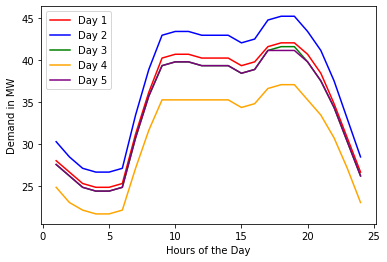

In [38]:
hours = np.arange(1,25)
fig = plt.figure()
plt.plot(hours, total_demand_day1, 'r', label='Day 1')
plt.plot(hours, total_demand_day2, 'b', label='Day 2')
plt.plot(hours, total_demand_day3, 'g', label='Day 3')
plt.plot(hours, total_demand_day4, 'orange', label='Day 4')
plt.plot(hours, total_demand_day5, 'purple', label='Day 5')
plt.xlabel('Hours of the Day')
plt.ylabel('Demand in MW')
plt.legend()
fig.savefig('demand_by_hours.png')
plt.show()

In [39]:
min_up_time = np.array(generation['minUP'])
min_up_time

array([12, 24, 12,  8,  8,  4, 24,  8,  4,  8,  8,  8,  8,  8,  8,  1,  1,
        1, 12,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  4,  8, 24, 12, 12,
       24,  8,  8,  8,  8,  8, 12,  4,  4,  4,  4,  1,  1,  1,  8, 24,  8,
        4,  1,  8])

In [40]:
min_down_time = np.array(generation['minDOWN'])
min_down_time

array([10, 48, 10,  8,  8,  2,  1,  8,  2,  8,  8,  8,  8,  8,  8,  1,  1,
        1, 10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  4,  1, 10, 10,
        1,  4,  4,  4,  4,  4, 10,  2,  2,  2,  2,  1,  1,  1,  8, 48,  8,
        2,  1,  8])

In [41]:
power_demand_day1.shape

(118, 24)

In [42]:
fmin = fmin[:,np.newaxis]
fmin.shape

(186, 1)

In [43]:
fmax = fmax[:,np.newaxis]
fmax.shape

(186, 1)

In [44]:
pmin = pmin[:,np.newaxis]
pmin.shape

(54, 1)

In [45]:
pmax = pmax[:,np.newaxis]
pmax.shape

(54, 1)

In [46]:
hourly_ramp = hourly_ramp[:,np.newaxis]
hourly_ramp.shape

(54, 1)

In [47]:
startup_shutdown_ramp = startup_shutdown_ramp[:,np.newaxis]
startup_shutdown_ramp.shape

(54, 1)

In [48]:
#DAY 2 HAS THE HIGHEST LOAD AND DAY 4 HAS THE LOWEST LOAD
# First solving for day 1
d = power_demand_day1
T = 24

p = cp.Variable((generation.shape[0],T))
r = cp.Variable((generation.shape[0],T))
theta = cp.Variable((N,T))
u = cp.Variable((generation.shape[0],T),boolean = True) # Commitment variable
v = cp.Variable((generation.shape[0],T),boolean = True) # Startup variable
w = cp.Variable((generation.shape[0],T),boolean = True) # Shutdown variable

obj = cp.Minimize(cp.sum(linear_cost.T@p + startup_cost.T@v + shutdown_cost.T@w + noload_cost.T@u + reserve_cost.T@r))
# obj = cp.Minimize(cp.sum(linear_cost.T@p))

power_flow_constraints = [Egen@p - d == B@theta]
flow_limits = [fmin@np.ones((1,T)) <= b@M.T@theta, b@M.T@theta <= fmax@np.ones((1,T))]
generator_limits = [np.diag(pmin.T[0])@u + r <= p, p <= np.diag(pmax.T[0])@u - r]
ramp_limits_startup = [p[:,i] - p[:,i-1] <= np.diag(hourly_ramp.T[0])@u[:,i-1] + np.diag(startup_shutdown_ramp.T[0])@v[:,i] for i in range(1,T)]
ramp_limits_shutdown = [p[:,i-1] - p[:,i] <= np.diag(hourly_ramp.T[0])@u[:,i] + np.diag(startup_shutdown_ramp.T[0])@w[:,i] for i in range(1,T)]
commitment_constraints = [v[:,i] - w[:,i] == u[:,i] - u[:,i-1] for i in range(1,T)]

min_up_time_constraints = []
for idx, utime in enumerate(min_up_time):
    for t in range(utime-1,T):
        min_up_time_constraints += [cp.sum(v[idx,t-utime+1:t+1]) <= u[idx,t]]

min_down_time_constraints = []
for idx, dtime in enumerate(min_down_time):
    for t in range(dtime-1,T):
        min_down_time_constraints += [cp.sum(w[idx,t-dtime+1:t+1]) <= 1-u[idx,t]]

reserve_constraints = [cp.sum(r[:,t]) >= 0.07*cp.sum(d[:,t]) for t in range(T)]
reserve_constraints += [cp.sum(r[:,t]) >= p[idx,t] + r[idx,t] for t in range(T) for idx,_ in enumerate(pmax)]
reserve_constraints += [r <= np.diag(pmax.T[0])@u, r >= 0]

# constraints = power_flow_constraints + flow_limits + generator_limits + commitment_constraints + min_up_time_constraints + min_down_time_constraints + reserve_constraints + ramp_limits_startup + ramp_limits_shutdown
constraints = power_flow_constraints + flow_limits + generator_limits + commitment_constraints + reserve_constraints + ramp_limits_startup + ramp_limits_shutdown + min_up_time_constraints + min_down_time_constraints

prob = cp.Problem(obj, constraints)
prob.solve(solver = cp.GUROBI,verbose=True,MIPgap = 0.01)

                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 16 03:29:12 PM: Your problem has 9312 variables, 3465 constraints, and 0 parameters.
(CVXPY) May 16 03:29:12 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 16 03:29:12 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 16 03:29:12 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) May 16 03:29:13 PM: Compiling problem (target solver=GUROBI).
(CVXPY) May 16 03:29:13 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixS

191855.99108233556

In [49]:
p.value.shape

(54, 24)

In [50]:
r.value.shape

(54, 24)

In [51]:
d

array([[0.3162, 0.3009, 0.2856, ..., 0.3927, 0.3468, 0.3009],
       [0.124 , 0.118 , 0.112 , ..., 0.154 , 0.136 , 0.118 ],
       [0.2418, 0.2301, 0.2184, ..., 0.3003, 0.2652, 0.2301],
       ...,
       [1.1408, 1.0856, 1.0304, ..., 1.4168, 1.2512, 1.0856],
       [0.124 , 0.118 , 0.112 , ..., 0.154 , 0.136 , 0.118 ],
       [0.2046, 0.1947, 0.1848, ..., 0.2541, 0.2244, 0.1947]])

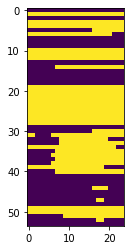

In [52]:
plt.imshow(u.value)

In [95]:
u.value

array([[-0., -0., -0., ..., -0., -0., -0.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [-0., -0., -0., ..., -0., -0., -0.],
       ...,
       [-0., -0., -0., ...,  1.,  1.,  1.],
       [-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.]])

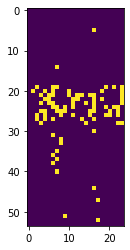

In [53]:
plt.imshow(v.value)

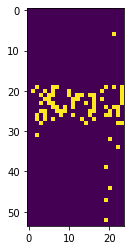

In [54]:
plt.imshow(w.value)

In [55]:
power_demand_day1

array([[0.3162, 0.3009, 0.2856, ..., 0.3927, 0.3468, 0.3009],
       [0.124 , 0.118 , 0.112 , ..., 0.154 , 0.136 , 0.118 ],
       [0.2418, 0.2301, 0.2184, ..., 0.3003, 0.2652, 0.2301],
       ...,
       [1.1408, 1.0856, 1.0304, ..., 1.4168, 1.2512, 1.0856],
       [0.124 , 0.118 , 0.112 , ..., 0.154 , 0.136 , 0.118 ],
       [0.2046, 0.1947, 0.1848, ..., 0.2541, 0.2244, 0.1947]])

In [56]:
power_demand_day2

array([[0.3417, 0.3213, 0.306 , ..., 0.4233, 0.3723, 0.3213],
       [0.134 , 0.126 , 0.12  , ..., 0.166 , 0.146 , 0.126 ],
       [0.2613, 0.2457, 0.234 , ..., 0.3237, 0.2847, 0.2457],
       ...,
       [1.2328, 1.1592, 1.104 , ..., 1.5272, 1.3432, 1.1592],
       [0.134 , 0.126 , 0.12  , ..., 0.166 , 0.146 , 0.126 ],
       [0.2211, 0.2079, 0.198 , ..., 0.2739, 0.2409, 0.2079]])

In [57]:
power_demand_day1_and_2_combined = np.concatenate((power_demand_day1, power_demand_day2), axis=1)
power_demand_day1_and_2_combined.shape

(118, 48)

In [58]:
p_g_t = p.value
p_g_t

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [2.88460932, 2.2623    , 2.45      , ..., 3.5       , 2.45      ,
        2.45      ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.072     , 0.072     ,
        0.024     ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [87]:
p_g_t.max(axis=0)

array([4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4.])

In [59]:
pmax.shape

(54, 1)

In [76]:
ones_vector = np.ones((54, 1))
dot_product_p_max = ones_vector.T @ pmax
dot_product_p_g_t = ones_vector.T @ p_g_t
reserve_margin_by_hr = dot_product_p_max - dot_product_p_g_t
reserve_margin_by_hr

array([[30.5722, 31.9279, 33.2836, 33.7355, 33.7355, 33.2836, 27.4089,
        22.438 , 18.3709, 17.919 , 17.919 , 18.3709, 18.3709, 18.3709,
        19.2747, 18.8228, 17.0152, 16.5633, 16.5633, 17.919 , 20.1785,
        23.7937, 27.8608, 31.9279]])

In [77]:
ones_vector = np.ones((54, 1))
dot_product_p_max = ones_vector.T @ pmax
dot_product_p_g_t = 1.5*ones_vector.T @ p_g_t
reserve_margin_by_hr_incr = dot_product_p_max - dot_product_p_g_t
reserve_margin_by_hr_incr

array([[16.5633 , 18.59685, 20.6304 , 21.30825, 21.30825, 20.6304 ,
        11.81835,  4.362  , -1.73865, -2.4165 , -2.4165 , -1.73865,
        -1.73865, -1.73865, -0.38295, -1.0608 , -3.7722 , -4.45005,
        -4.45005, -2.4165 ,  0.97275,  6.39555, 12.4962 , 18.59685]])

In [62]:
p_g_t_mean = p_g_t.mean(axis=0)
p_g_t_mean

array([0.51884815, 0.49374259, 0.46863704, 0.46026852, 0.46026852,
       0.46863704, 0.57742778, 0.66948148, 0.74479815, 0.75316667,
       0.75316667, 0.74479815, 0.74479815, 0.74479815, 0.72806111,
       0.73642963, 0.7699037 , 0.77827222, 0.77827222, 0.75316667,
       0.71132407, 0.64437593, 0.56905926, 0.49374259])

In [66]:
demand_mean = d.mean(axis=0)
demand_mean.shape

(24,)

In [72]:
reserve_mean = r.value.mean(axis=0)
reserve_mean.shape

(24,)

In [73]:
aggregate_reserve_df = pd.DataFrame(reserve_mean, columns=['aggregate_reserve'])
aggregate_reserve_df

,aggregate_reserve
0,0.074074
1,0.074074
2,0.074074
3,0.074074
4,0.074074
5,0.074074
6,0.074074
7,0.074074
8,0.074074
9,0.074074


In [68]:
aggregate_demand_df = pd.DataFrame(demand_mean, columns=['aggregate_demand'])
aggregate_demand_df

,aggregate_demand
0,0.237439
1,0.225950
2,0.214461
3,0.210631
4,0.210631
5,0.214461
6,0.264247
7,0.306373
8,0.340840
9,0.344669


In [70]:
aggregate_generation_df = pd.DataFrame(p_g_t_mean, columns=['aggregate_generation'])
aggregate_generation_df

,aggregate_generation
0,0.518848
1,0.493743
2,0.468637
3,0.460269
4,0.460269
5,0.468637
6,0.577428
7,0.669481
8,0.744798
9,0.753167


In [88]:
max_gen_id = np.argmax(p.value + r.value, axis=0)
max_disp_res = np.max(p.value + r.value, axis=0)

In [90]:
max_gen_id_df = pd.DataFrame(max_gen_id, columns=['max_gen_id'])
max_gen_id_df

,max_gen_id
0,6
1,6
2,6
3,6
4,6
5,6
6,6
7,6
8,6
9,6


In [91]:
max_disp_res_df = pd.DataFrame(max_disp_res, columns=['max_disp_res'])
max_disp_res_df

,max_disp_res
0,4.0
1,4.0
2,4.0
3,4.0
4,4.0
5,4.0
6,4.0
7,4.0
8,4.0
9,4.0


In [92]:
aggregated_df = pd.concat([aggregate_generation_df, aggregate_demand_df, aggregate_reserve_df, max_gen_id_df, max_disp_res_df], axis=1)
aggregated_df

,aggregate_generation,aggregate_demand,aggregate_reserve,max_gen_id,max_disp_res
0,0.518848,0.237439,0.074074,6,4.0
1,0.493743,0.225950,0.074074,6,4.0
2,0.468637,0.214461,0.074074,6,4.0
3,0.460269,0.210631,0.074074,6,4.0
4,0.460269,0.210631,0.074074,6,4.0
5,0.468637,0.214461,0.074074,6,4.0
6,0.577428,0.264247,0.074074,6,4.0
7,0.669481,0.306373,0.074074,6,4.0
8,0.744798,0.340840,0.074074,6,4.0
9,0.753167,0.344669,0.074074,6,4.0


In [93]:
aggregated_df.to_latex()

/var/folders/d6/lknhzc7j7wv09bqbqmc1yg4r0000gn/T/ipykernel_81759/2405338512.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  aggregated_df.to_latex()


'\\begin{tabular}{lrrrrr}\n\\toprule\n{} &  aggregate\\_generation &  aggregate\\_demand &  aggregate\\_reserve &  max\\_gen\\_id &  max\\_disp\\_res \\\\\n\\midrule\n0  &              0.518848 &          0.237439 &           0.074074 &           6 &           4.0 \\\\\n1  &              0.493743 &          0.225950 &           0.074074 &           6 &           4.0 \\\\\n2  &              0.468637 &          0.214461 &           0.074074 &           6 &           4.0 \\\\\n3  &              0.460269 &          0.210631 &           0.074074 &           6 &           4.0 \\\\\n4  &              0.460269 &          0.210631 &           0.074074 &           6 &           4.0 \\\\\n5  &              0.468637 &          0.214461 &           0.074074 &           6 &           4.0 \\\\\n6  &              0.577428 &          0.264247 &           0.074074 &           6 &           4.0 \\\\\n7  &              0.669481 &          0.306373 &           0.074074 &           6 &           4.0 \\\\\n8

In [101]:
#solving for day 2
d2 = power_demand_day1_and_2_combined
T = 48

p2 = cp.Variable((generation.shape[0],T))
r2 = cp.Variable((generation.shape[0],T))
theta2 = cp.Variable((N,T))
u2 = cp.Variable((generation.shape[0],T),boolean = True) # Commitment variable
v2 = cp.Variable((generation.shape[0],T),boolean = True) # Startup variable
w2 = cp.Variable((generation.shape[0],T),boolean = True) # Shutdown variable


obj = cp.Minimize(cp.sum(linear_cost.T@p2 + startup_cost.T@v2 + shutdown_cost.T@w2 + noload_cost.T@u2 + reserve_cost.T@r2))
# obj = cp.Minimize(cp.sum(linear_cost.T@p))

power_flow_constraints = [Egen@p2 - d2 == B@theta2]
flow_limits = [fmin@np.ones((1,T)) <= b@M.T@theta2, b@M.T@theta2 <= fmax@np.ones((1,T))]
generator_limits = [np.diag(pmin.T[0])@u2 + r2 <= p2, p2 <= np.diag(pmax.T[0])@u2 - r2]

#ramp_limits_startup = [p2[:,i] - p[:,i-1] <= np.diag(hourly_ramp.T[0])@u[:,i-1] + np.diag(startup_shutdown_ramp.T[0])@v[:,i]]
ramp_limits_startup = [p2[:,i] - p2[:,i-1] <= np.diag(hourly_ramp.T[0])@u2[:,i-1] + np.diag(startup_shutdown_ramp.T[0])@v2[:,i] for i in range(1,T)]
ramp_limits_shutdown = [p2[:,i-1] - p2[:,i] <= np.diag(hourly_ramp.T[0])@u2[:,i] + np.diag(startup_shutdown_ramp.T[0])@w2[:,i] for i in range(1,T)]
commitment_constraints = [v2[:,i] - w2[:,i] == u2[:,i] - u2[:,i-1] for i in range(1,T)]
prev_day_constraints_p = [p2[:,i] == p[:,i] for i in range(1,24)]
prev_day_constraints_u = [u2[:,i] == u[:,i] for i in range(1,24)]
prev_day_constraints_v = [v2[:,i] == v[:,i] for i in range(1,24)]
prev_day_constraints_w = [w2[:,i] == w[:,i] for i in range(1,24)]
prev_day_constraints_theta = [theta2[:,i] == theta[:,i] for i in range(1,24)]
prev_day_constraints_r = [r2[:,i] == r[:,i] for i in range(1,24)]


min_up_time_constraints = []
for idx, utime in enumerate(min_up_time):
    for t in range(utime-1,T):
        min_up_time_constraints += [cp.sum(v2[idx,t-utime+1:t+1]) <= u2[idx,t]]

min_down_time_constraints = []
for idx, dtime in enumerate(min_down_time):
    for t in range(dtime-1,T):
        min_down_time_constraints += [cp.sum(w2[idx,t-dtime+1:t+1]) <= 1-u2[idx,t]]

reserve_constraints = [cp.sum(r2[:,t]) >= 0.07*cp.sum(d2[:,t]) for t in range(T)]
reserve_constraints += [cp.sum(r2[:,t]) >= p2[idx,t] + r2[idx,t] for t in range(T) for idx,_ in enumerate(pmax)]
reserve_constraints += [r2 <= np.diag(pmax.T[0])@u2, r2 >= 0]

# constraints = power_flow_constraints + flow_limits + generator_limits + commitment_constraints + min_up_time_constraints + min_down_time_constraints + reserve_constraints + ramp_limits_startup + ramp_limits_shutdown
constraints = power_flow_constraints + prev_day_constraints_p + prev_day_constraints_u + prev_day_constraints_v + prev_day_constraints_w + prev_day_constraints_theta + prev_day_constraints_r + flow_limits + generator_limits + commitment_constraints + reserve_constraints + ramp_limits_startup + ramp_limits_shutdown + min_up_time_constraints + min_down_time_constraints

prob = cp.Problem(obj, constraints)
prob.solve(solver = cp.GUROBI,verbose=True,MIPgap = 0.05)

                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 16 02:59:30 PM: Your problem has 27936 variables, 7541 constraints, and 0 parameters.
(CVXPY) May 16 02:59:30 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 16 02:59:30 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 16 02:59:30 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) May 16 02:59:30 PM: Compiling problem (target solver=GUROBI).
(CVXPY) May 16 02:59:30 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrix

425236.436372819

In [102]:
power_demand_combined_upto_day3 = np.concatenate((power_demand_day1_and_2_combined, power_demand_day3), axis=1)
power_demand_combined_upto_day3

array([[0.3162, 0.3009, 0.2856, ..., 0.3876, 0.3417, 0.2958],
       [0.124 , 0.118 , 0.112 , ..., 0.152 , 0.134 , 0.116 ],
       [0.2418, 0.2301, 0.2184, ..., 0.2964, 0.2613, 0.2262],
       ...,
       [1.1408, 1.0856, 1.0304, ..., 1.3984, 1.2328, 1.0672],
       [0.124 , 0.118 , 0.112 , ..., 0.152 , 0.134 , 0.116 ],
       [0.2046, 0.1947, 0.1848, ..., 0.2508, 0.2211, 0.1914]])

In [103]:
#solving for day 3
d3 = power_demand_combined_upto_day3
T = 72

p3 = cp.Variable((generation.shape[0],T))
r3 = cp.Variable((generation.shape[0],T))
theta3 = cp.Variable((N,T))
u3 = cp.Variable((generation.shape[0],T),boolean = True) # Commitment variable
v3 = cp.Variable((generation.shape[0],T),boolean = True) # Startup variable
w3 = cp.Variable((generation.shape[0],T),boolean = True) # Shutdown variable


obj = cp.Minimize(cp.sum(linear_cost.T@p3 + startup_cost.T@v3 + shutdown_cost.T@w3 + noload_cost.T@u3 + reserve_cost.T@r3))


power_flow_constraints = [Egen@p3 - d3 == B@theta3]
flow_limits = [fmin@np.ones((1,T)) <= b@M.T@theta3, b@M.T@theta3 <= fmax@np.ones((1,T))]
generator_limits = [np.diag(pmin.T[0])@u3 + r3 <= p3, p3 <= np.diag(pmax.T[0])@u3 - r3]

#ramp_limits_startup = [p2[:,i] - p[:,i-1] <= np.diag(hourly_ramp.T[0])@u[:,i-1] + np.diag(startup_shutdown_ramp.T[0])@v[:,i]]
ramp_limits_startup = [p3[:,i] - p3[:,i-1] <= np.diag(hourly_ramp.T[0])@u3[:,i-1] + np.diag(startup_shutdown_ramp.T[0])@v3[:,i] for i in range(1,T)]
ramp_limits_shutdown = [p3[:,i-1] - p3[:,i] <= np.diag(hourly_ramp.T[0])@u3[:,i] + np.diag(startup_shutdown_ramp.T[0])@w3[:,i] for i in range(1,T)]
commitment_constraints = [v3[:,i] - w3[:,i] == u3[:,i] - u3[:,i-1] for i in range(1,T)]
prev_day_constraints_p = [p3[:,i] == p2[:,i] for i in range(1,48)]
prev_day_constraints_u = [u3[:,i] == u2[:,i] for i in range(1,48)]
prev_day_constraints_v = [v3[:,i] == v2[:,i] for i in range(1,48)]
prev_day_constraints_w = [w3[:,i] == w2[:,i] for i in range(1,48)]
prev_day_constraints_theta = [theta3[:,i] == theta2[:,i] for i in range(1,48)]
prev_day_constraints_r = [r3[:,i] == r2[:,i] for i in range(1,48)]


min_up_time_constraints = []
for idx, utime in enumerate(min_up_time):
    for t in range(utime-1,T):
        min_up_time_constraints += [cp.sum(v3[idx,t-utime+1:t+1]) <= u3[idx,t]]

min_down_time_constraints = []
for idx, dtime in enumerate(min_down_time):
    for t in range(dtime-1,T):
        min_down_time_constraints += [cp.sum(w3[idx,t-dtime+1:t+1]) <= 1-u3[idx,t]]

reserve_constraints = [cp.sum(r3[:,t]) >= 0.07*cp.sum(d3[:,t]) for t in range(T)]
reserve_constraints += [cp.sum(r3[:,t]) >= p3[idx,t] + r3[idx,t] for t in range(T) for idx,_ in enumerate(pmax)]
reserve_constraints += [r3 <= np.diag(pmax.T[0])@u3, r3 >= 0]

# constraints = power_flow_constraints + flow_limits + generator_limits + commitment_constraints + min_up_time_constraints + min_down_time_constraints + reserve_constraints + ramp_limits_startup + ramp_limits_shutdown
constraints = power_flow_constraints + prev_day_constraints_p + prev_day_constraints_u + prev_day_constraints_v + prev_day_constraints_w + prev_day_constraints_theta + prev_day_constraints_r + flow_limits + generator_limits + commitment_constraints + reserve_constraints + ramp_limits_startup + ramp_limits_shutdown + min_up_time_constraints + min_down_time_constraints

prob3 = cp.Problem(obj, constraints)
prob3.solve(solver = cp.GUROBI,verbose=True,MIPgap = 0.05)

                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 16 03:01:28 PM: Your problem has 46560 variables, 11669 constraints, and 0 parameters.
(CVXPY) May 16 03:01:29 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 16 03:01:29 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 16 03:01:29 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) May 16 03:01:29 PM: Compiling problem (target solver=GUROBI).
(CVXPY) May 16 03:01:29 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatri

(CVXPY) May 16 03:03:20 PM: Optimal value: 6.141e+05
(CVXPY) May 16 03:03:20 PM: Compilation took 2.409e+01 seconds
(CVXPY) May 16 03:03:20 PM: Solver (including time spent in interface) took 8.705e+01 seconds


614147.081307615

In [93]:
power_demand_combined_upto_day4 = np.concatenate((power_demand_combined_upto_day3, power_demand_day4), axis=1)
power_demand_combined_upto_day4

array([[0.3162, 0.3009, 0.2856, ..., 0.3468, 0.306 , 0.2601],
       [0.124 , 0.118 , 0.112 , ..., 0.136 , 0.12  , 0.102 ],
       [0.2418, 0.2301, 0.2184, ..., 0.2652, 0.234 , 0.1989],
       ...,
       [1.1408, 1.0856, 1.0304, ..., 1.2512, 1.104 , 0.9384],
       [0.124 , 0.118 , 0.112 , ..., 0.136 , 0.12  , 0.102 ],
       [0.2046, 0.1947, 0.1848, ..., 0.2244, 0.198 , 0.1683]])

In [ ]:
#solving for day 4
d4 = power_demand_combined_upto_day4
T = 96

p4 = cp.Variable((generation.shape[0],T))
r4 = cp.Variable((generation.shape[0],T))
theta4 = cp.Variable((N,T))
u4 = cp.Variable((generation.shape[0],T),boolean = True) # Commitment variable
v4 = cp.Variable((generation.shape[0],T),boolean = True) # Startup variable
w4 = cp.Variable((generation.shape[0],T),boolean = True) # Shutdown variable

obj = cp.Minimize(cp.sum(linear_cost.T@p4 + startup_cost.T@v4 + shutdown_cost.T@w4 + noload_cost.T@u4 + reserve_cost.T@r4))
# obj = cp.Minimize(cp.sum(linear_cost.T@p))

power_flow_constraints = [Egen@p4 - d4 == B@theta4]
flow_limits = [fmin@np.ones((1,T)) <= b@M.T@theta4, b@M.T@theta4 <= fmax@np.ones((1,T))]
generator_limits = [np.diag(pmin.T[0])@u4 + r4 <= p4, p4 <= np.diag(pmax.T[0])@u4 - r4]

#ramp_limits_startup = [p2[:,i] - p[:,i-1] <= np.diag(hourly_ramp.T[0])@u[:,i-1] + np.diag(startup_shutdown_ramp.T[0])@v[:,i]]
ramp_limits_startup = [p4[:,i] - p4[:,i-1] <= np.diag(hourly_ramp.T[0])@u4[:,i-1] + np.diag(startup_shutdown_ramp.T[0])@v4[:,i] for i in range(1,T)]
ramp_limits_shutdown = [p4[:,i-1] - p4[:,i] <= np.diag(hourly_ramp.T[0])@u4[:,i] + np.diag(startup_shutdown_ramp.T[0])@w4[:,i] for i in range(1,T)]
commitment_constraints = [v4[:,i] - w4[:,i] == u4[:,i] - u4[:,i-1] for i in range(1,T)]
prev_day_constraints_p = [p4[:,i] == p3[:,i] for i in range(1,72)]
prev_day_constraints_u = [u4[:,i] == u3[:,i] for i in range(1,72)]
prev_day_constraints_v = [v4[:,i] == v3[:,i] for i in range(1,72)]
prev_day_constraints_w = [w4[:,i] == w3[:,i] for i in range(1,72)]
prev_day_constraints_theta = [theta4[:,i] == theta3[:,i] for i in range(1,72)]
prev_day_constraints_r = [r4[:,i] == r3[:,i] for i in range(1,48)]


min_up_time_constraints = []
for idx, utime in enumerate(min_up_time):
    for t in range(utime-1,T):
        min_up_time_constraints += [cp.sum(v4[idx,t-utime+1:t+1]) <= u4[idx,t]]

min_down_time_constraints = []
for idx, dtime in enumerate(min_down_time):
    for t in range(dtime-1,T):
        min_down_time_constraints += [cp.sum(w4[idx,t-dtime+1:t+1]) <= 1-u4[idx,t]]

reserve_constraints = [cp.sum(r4[:,t]) >= 0.07*cp.sum(d4[:,t]) for t in range(T)]
reserve_constraints += [cp.sum(r4[:,t]) >= p4[idx,t] + r4[idx,t] for t in range(T) for idx,_ in enumerate(pmax)]
reserve_constraints += [r4 <= np.diag(pmax.T[0])@u4, r4 >= 0]

# constraints = power_flow_constraints + flow_limits + generator_limits + commitment_constraints + min_up_time_constraints + min_down_time_constraints + reserve_constraints + ramp_limits_startup + ramp_limits_shutdown
constraints = power_flow_constraints + prev_day_constraints_p + prev_day_constraints_u + prev_day_constraints_v + prev_day_constraints_w + prev_day_constraints_theta + prev_day_constraints_r + flow_limits + generator_limits + commitment_constraints + reserve_constraints + ramp_limits_startup + ramp_limits_shutdown + min_up_time_constraints + min_down_time_constraints

prob4 = cp.Problem(obj, constraints)
prob4.solve(solver = cp.GUROBI,verbose=True,MIPgap = 0.05)

In [67]:
power_demand_combined_upto_day5 = np.concatenate((power_demand_combined_upto_day4, power_demand_day5), axis=1)
power_demand_combined_upto_day5

array([[0.3162, 0.3009, 0.2856, ..., 0.3876, 0.3417, 0.2958],
       [0.124 , 0.118 , 0.112 , ..., 0.152 , 0.134 , 0.116 ],
       [0.2418, 0.2301, 0.2184, ..., 0.2964, 0.2613, 0.2262],
       ...,
       [1.1408, 1.0856, 1.0304, ..., 1.3984, 1.2328, 1.0672],
       [0.124 , 0.118 , 0.112 , ..., 0.152 , 0.134 , 0.116 ],
       [0.2046, 0.1947, 0.1848, ..., 0.2508, 0.2211, 0.1914]])

In [68]:
#solving for day 5
d5 = power_demand_combined_upto_day5
T = 120

p5 = cp.Variable((generation.shape[0],T))
r5 = cp.Variable((generation.shape[0],T))
theta5 = cp.Variable((N,T))
u5 = cp.Variable((generation.shape[0],T),boolean = True) # Commitment variable
v5 = cp.Variable((generation.shape[0],T),boolean = True) # Startup variable
w5 = cp.Variable((generation.shape[0],T),boolean = True) # Shutdown variable

obj = cp.Minimize(cp.sum(linear_cost.T@p5 + startup_cost.T@v5 + shutdown_cost.T@w5 + noload_cost.T@u5 + reserve_cost.T@r5))
# obj = cp.Minimize(cp.sum(linear_cost.T@p))

power_flow_constraints = [Egen@p5 - d5 == B@theta5]
flow_limits = [fmin@np.ones((1,T)) <= b@M.T@theta5, b@M.T@theta5 <= fmax@np.ones((1,T))]
generator_limits = [np.diag(pmin.T[0])@u5 + r5 <= p5, p5 <= np.diag(pmax.T[0])@u5 - r5]

ramp_limits_startup = [p5[:,i] - p5[:,i-1] <= np.diag(hourly_ramp.T[0])@u5[:,i-1] + np.diag(startup_shutdown_ramp.T[0])@v5[:,i] for i in range(1,T)]
ramp_limits_shutdown = [p5[:,i-1] - p5[:,i] <= np.diag(hourly_ramp.T[0])@u5[:,i] + np.diag(startup_shutdown_ramp.T[0])@w5[:,i] for i in range(1,T)]
commitment_constraints = [v5[:,i] - w5[:,i] == u5[:,i] - u5[:,i-1] for i in range(1,T)]
prev_day_constraints_p = [p5[:,i] == p4[:,i] for i in range(1,96)]
prev_day_constraints_u = [u5[:,i] == u4[:,i] for i in range(1,96)]
prev_day_constraints_v = [v5[:,i] == v4[:,i] for i in range(1,96)]
prev_day_constraints_w = [w5[:,i] == w4[:,i] for i in range(1,96)]
prev_day_constraints_theta = [theta5[:,i] == theta4[:,i] for i in range(1,96)]
prev_day_constraints_r = [r5[:,i] == r4[:,i] for i in range(1,96)]


min_up_time_constraints = []
for idx, utime in enumerate(min_up_time):
    for t in range(utime-1,T):
        min_up_time_constraints += [cp.sum(v5[idx,t-utime+1:t+1]) <= u5[idx,t]]

min_down_time_constraints = []
for idx, dtime in enumerate(min_down_time):
    for t in range(dtime-1,T):
        min_down_time_constraints += [cp.sum(w5[idx,t-dtime+1:t+1]) <= 1-u5[idx,t]]

reserve_constraints = [cp.sum(r5[:,t]) >= 0.07*cp.sum(d5[:,t]) for t in range(T)]
reserve_constraints += [cp.sum(r5[:,t]) >= p5[idx,t] + r5[idx,t] for t in range(T) for idx,_ in enumerate(pmax)]
reserve_constraints += [r5 <= np.diag(pmax.T[0])@u5, r5 >= 0]

# constraints = power_flow_constraints + flow_limits + generator_limits + commitment_constraints + min_up_time_constraints + min_down_time_constraints + reserve_constraints + ramp_limits_startup + ramp_limits_shutdown
constraints = power_flow_constraints + prev_day_constraints_p + prev_day_constraints_u + prev_day_constraints_v + prev_day_constraints_w + prev_day_constraints_theta + prev_day_constraints_r + flow_limits + generator_limits + commitment_constraints + reserve_constraints + ramp_limits_startup + ramp_limits_shutdown + min_up_time_constraints + min_down_time_constraints

prob4 = cp.Problem(obj, constraints)
prob4.solve(solver = cp.GUROBI,verbose=True,MIPgap = 0.05)

                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 16 01:29:34 PM: Your problem has 83808 variables, 19925 constraints, and 0 parameters.
(CVXPY) May 16 01:29:35 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 16 01:29:35 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 16 01:29:35 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) May 16 01:29:36 PM: Compiling problem (target solver=GUROBI).
(CVXPY) May 16 01:29:36 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatri

960194.936948663

In [69]:
M.T.shape

(186, 118)

In [94]:
b.shape

(186, 186)

In [163]:
d.shape

(118, 24)